In [2]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

9920512it [00:04, 2261573.59it/s]
Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw
32768it [00:00, 46210.50it/s]
Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw
1654784it [00:01, 940241.37it/s]
Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw
8192it [00:00, 17148.09it/s]
Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
Processing...
Done!


In [3]:
num_workers = 0
batch_size = 20
train_loader= torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader= torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

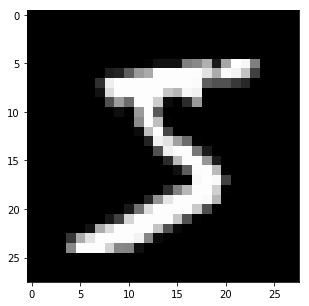

In [8]:
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
img = np.squeeze(images[0])
fig = plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
# MPNet load point cloud data


In [11]:
import torch.nn as nn 
import torch.nn.functional as F 

class MPNetAutoEncoder(nn.Module):
    def __init__(self, input_size, encoding_dim):
        super(MPNetEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(input_size, 256), nn.PReLU(),
        nn.Linear(256,256), nn.PReLU(),
        nn.Linear(256, encoding_dim))

        self.decoder = nn.Sequential(nn.Linear(encoding_dim, 256), nn.PReLU(),
        nn.Linear(256,256), nn.PReLU(),
        nn.Linear(256, input_size))
    
    def forward(self, x):
        x = self.encoder(x)
        y = self.decoder(x)
        return y

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__() 
        self.fc1 = nn.Linear(28*28, encoding_dim)
        self.fc2 = nn.Linear(encoding_dim, 28*28)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x 
encoding_dim = 32 
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [13]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 20
for epoch in range(1, n_epochs+1):
    train_loss = 0.0 

    for data in train_loader:
        images, _ = data 
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs=model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)

    train_loss = train_loss/len(train_loader)
    print('Epoch :{}\tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch :1	Training Loss: 0.679904
Epoch :2	Training Loss: 0.362335
Epoch :3	Training Loss: 0.308718
Epoch :4	Training Loss: 0.298569
Epoch :5	Training Loss: 0.294819
Epoch :6	Training Loss: 0.292571
Epoch :7	Training Loss: 0.290816
Epoch :8	Training Loss: 0.289441
Epoch :9	Training Loss: 0.288301
Epoch :10	Training Loss: 0.287407
Epoch :11	Training Loss: 0.286652
Epoch :12	Training Loss: 0.285985
Epoch :13	Training Loss: 0.285385
Epoch :14	Training Loss: 0.284838
Epoch :15	Training Loss: 0.284333
Epoch :16	Training Loss: 0.283856
Epoch :17	Training Loss: 0.283365
Epoch :18	Training Loss: 0.282922
Epoch :19	Training Loss: 0.282521
Epoch :20	Training Loss: 0.282142


torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 784])
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020750279198>


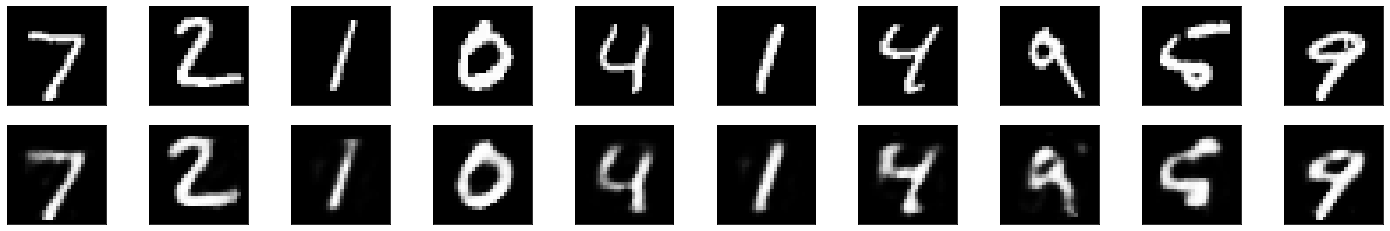

In [20]:
dataiter = iter(test_loader)
images, labels = dataiter.next() 
print (images.size())
print(labels.size())
images_flatten= images.view(images.size(0), -1)
print(images_flatten.size())
output = model(images_flatten)
images = images.numpy()

output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

print(axes)
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)